In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
%matplotlib inline

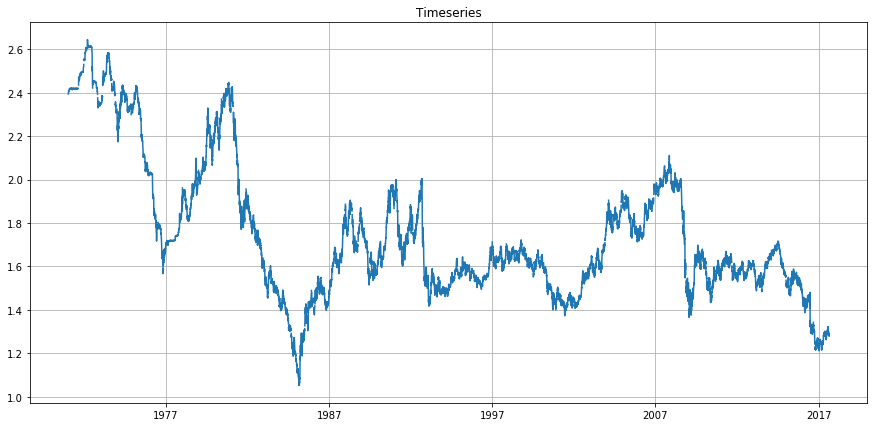

In [144]:
data = pd.read_csv('\\timeseries\\exchange_rates.csv', index_col=['time_period'], parse_dates=['time_period'])

plt.figure(figsize=(15, 7))
plt.plot(data.UK)
plt.title('Timeseries')
plt.grid(True)
plt.show()

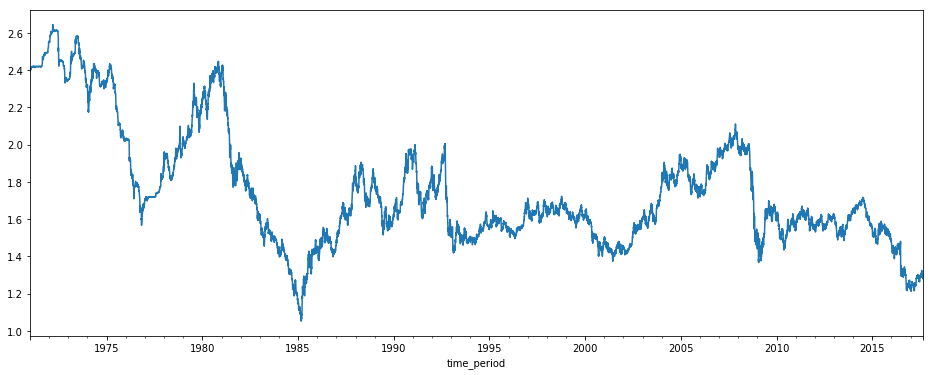

In [145]:
data['UK'].interpolate(method='linear').plot(figsize = (16,6))
data_imputed =data['UK'].interpolate(method='linear')
data_imputed =pd.DataFrame(data_imputed)

In [146]:
def plotTimeSeries(series, window, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Anomalies in the time series for \n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Calculate confidence intervals based on MAE
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    lower_band = rolling_mean - (mae + scale * deviation)
    upper_band = rolling_mean + (mae + scale * deviation)
        
    # Calculate Anomalies
    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    anomalies[series<lower_band] = series[series<lower_band]
    anomalies[series>upper_band] = series[series>upper_band]
    
    #Plot the confidence intervals and anomalies
    plt.plot(upper_band, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_band, "r--")
    plt.plot(anomalies, "ro", markersize=8)   
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

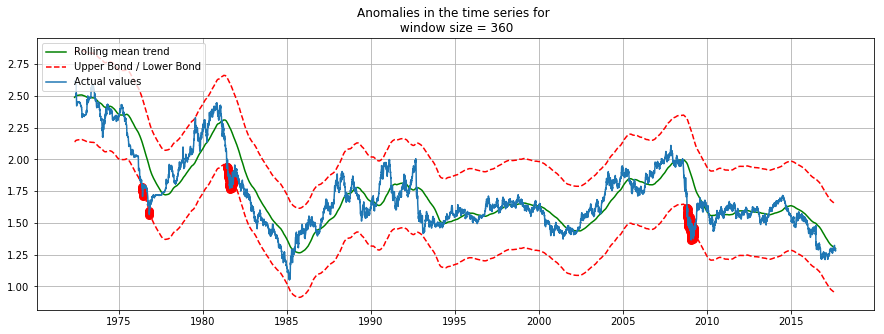

In [147]:
plotTimeSeries(data_imputed, 360)